Import all required packages

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Read the data set and drop all rows containing NA values

In [196]:
df = pd.read_csv('greenbuildings.csv')
df.isna().sum()
print('Before cleaning df count =',df.shape[0])
df = df.dropna()
df.isna().sum()
print('After cleaning df count =',df.shape[0])

Before cleaning df count = 7894
After cleaning df count = 7820


View the final dataset

In [197]:
df

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,157117,1230,1300000,1.15,137.51,100.00,41,35,0,1,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7890,158379,1230,16140,1.15,152.73,75.22,8,90,1,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7891,52316,1230,15726,1.15,158.92,100.00,6,67,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7892,158124,1230,51300,1.15,198.99,100.00,12,91,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72


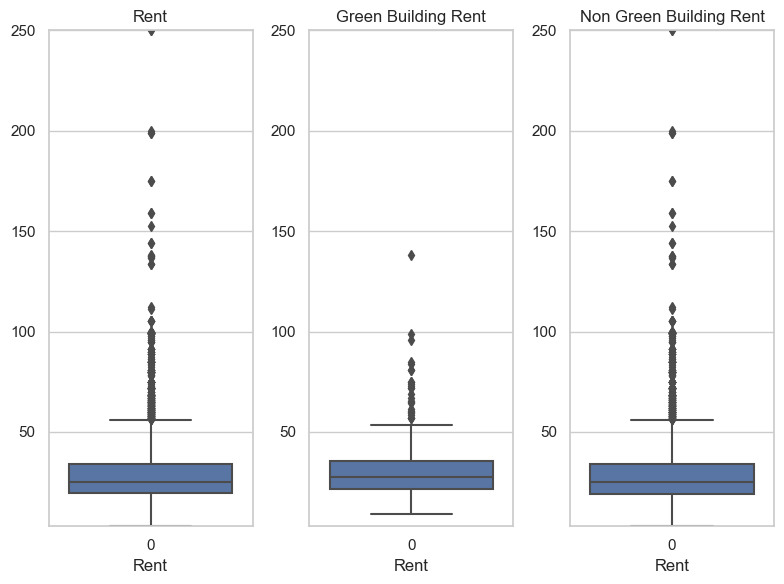

In [198]:
#Green vs Non Green Rent
percentile_5 = df['Rent'].quantile(0.05)
percentile_95 = df['Rent'].quantile(0.95)

y_limit = (min(df['Rent']), max(df['Rent']))

plt.figure(figsize=(8, 6))

plt.subplot(131)
sns.set(style="whitegrid")
sns.boxplot(data = df['Rent'])
plt.xlabel("Rent")
plt.title("Rent")
plt.ylim(y_limit)


plt.subplot(132)
sns.boxplot(data=df[df['green_rating'] ==  1]['Rent'])
plt.xlabel("Rent")
plt.title("Green Building Rent")
plt.ylim(y_limit)

plt.subplot(133)
sns.boxplot(data=df[df['green_rating'] ==  0]['Rent'].reset_index(drop=True))
plt.xlabel("Rent")
plt.title("Non Green Building Rent")
plt.ylim(y_limit)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

Since there are so many outliers in  our target variable 'Rent', we will take the 90% range of the values to remove and adjust for the outliers

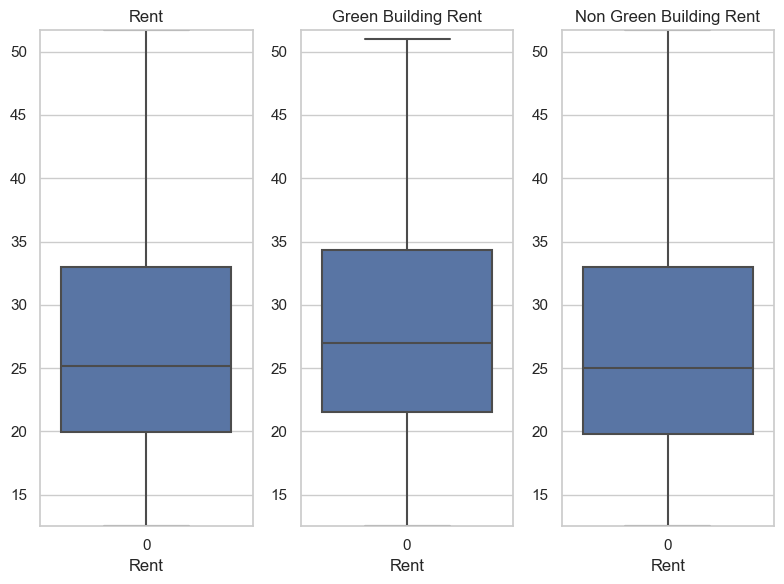

In [199]:
# Filter values based on the percentiles
df = df[(df['Rent'] >= percentile_5) & (df['Rent'] <= percentile_95)]
y_limit = (min(df['Rent']), max(df['Rent']))

plt.figure(figsize=(8, 6))

plt.subplot(131)
sns.set(style="whitegrid")
sns.boxplot(data = df['Rent'])
plt.xlabel("Rent")
plt.title("Rent")
plt.ylim(y_limit)


plt.subplot(132)
sns.boxplot(data=df[df['green_rating'] ==  1]['Rent'])
plt.xlabel("Rent")
plt.title("Green Building Rent")
plt.ylim(y_limit)

plt.subplot(133)
sns.boxplot(data=df[df['green_rating'] ==  0]['Rent'].reset_index(drop=True))
plt.xlabel("Rent")
plt.title("Non Green Building Rent")
plt.ylim(y_limit)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

Seperate DataFrame to Green and Non Green Buildings

In [200]:
df.isnull().sum()
df['green_rating'].value_counts()
df_green = df[df['green_rating']==1]
df_green

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.0137,0.0290,36.780
6,236739,6,210038,4.01,12.50,94.33,11,38,0,0,...,1,0,1,2746,1670,4416,25.55,0.0101,0.0289,17.500
16,431225,8,409889,67.78,30.50,97.06,20,6,0,1,...,1,0,0,5240,956,6196,10.46,0.0120,0.0235,25.500
29,204299,11,525422,1.74,25.00,71.10,16,23,0,1,...,1,0,1,1113,6001,7114,41.32,0.0108,0.0233,22.000
34,437486,13,378538,3.27,26.61,95.54,17,22,0,1,...,1,0,1,2269,2382,4651,40.70,0.0138,0.0229,25.055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7707,320631,1223,379203,1.97,45.61,95.50,23,20,0,1,...,1,0,1,130,2739,2869,22.71,0.0103,0.0378,35.000
7750,333402,1224,120000,1.97,48.00,100.00,4,22,0,1,...,1,0,0,130,2739,2869,22.71,0.0103,0.0378,48.000
7754,246824,1225,194844,2.38,49.77,87.13,16,20,0,1,...,1,0,1,684,1419,2103,22.71,0.0103,0.0378,59.245
7760,247971,1226,207082,2.38,50.85,88.99,10,35,1,1,...,1,0,1,684,1419,2103,22.71,0.0103,0.0378,36.000


In [201]:
df_non_green = df[df['green_rating']==0]
df_non_green

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
5,94765,1,231633,2.22,43.16,92.74,14,20,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856,157718,1230,173444,1.15,49.00,83.83,20,95,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7857,157420,1230,364000,1.15,50.00,98.46,22,52,0,0,...,0,0,1,1299,4796,6095,48.35,0.011757,0.045457,58.72
7858,157624,1230,212500,1.15,50.00,99.15,17,83,0,0,...,0,0,1,1299,4796,6095,48.35,0.011757,0.045457,58.72
7859,157777,1230,150000,1.15,50.55,82.00,15,83,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72


Check Correlation of Rent against all variables in the entire dataset

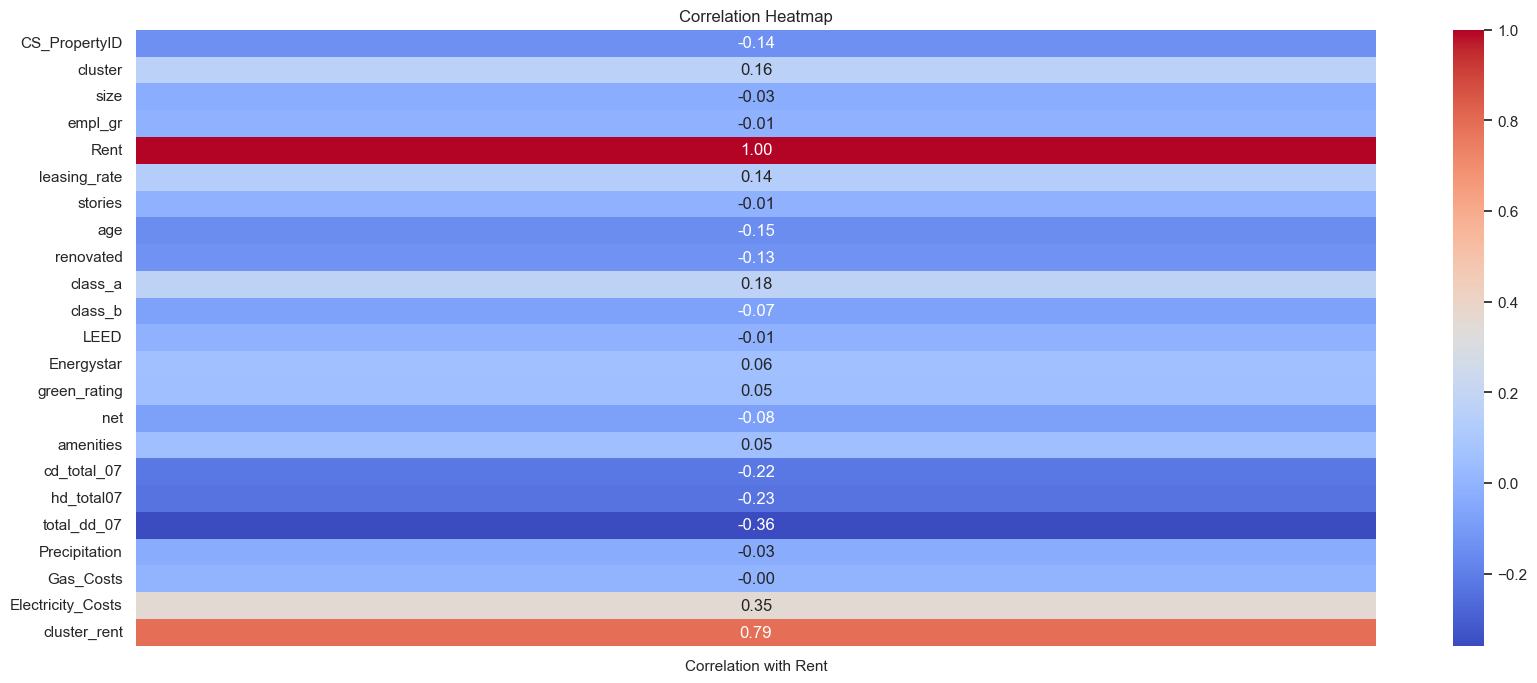

In [202]:
#Overall data variable correlation
columns_to_drop = ['CS_PropertyID','cluster']
# correlation_matrix = df.drop(columns=columns_to_drop).corr()
correlation_matrix = df.corrwith(df['Rent'])

# Create a DataFrame with correlation values
correlation_df = pd.DataFrame({'Correlation with Rent': correlation_matrix})

plt.figure(figsize=(20, 8))  # Adjust the figure size (optional)
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

Cluster Rent is the most highily corelated which we could have expected as the ret in a particular cluster should ideally be similar and closely related to the mean rent of the buildings in the cluster

class_a buildings seem to have a higher positive correlation as compared to class_b buildings indicating a differce in rental income based on building class

green_rating, LEED, Energystar all have slight poitive corelation with rent indicating Green Buildings in general should have a slightly higher rent

Electriciy_Costs seem to be poitively correlated with rent

The other pretty standard/obvious parameters affecting rent positively are:leasing_rate
The other pretty standard/obvious parameters affecting rent negatively are:age

Check Correlation of Rent against all variables of the Green Buildings in the dataset

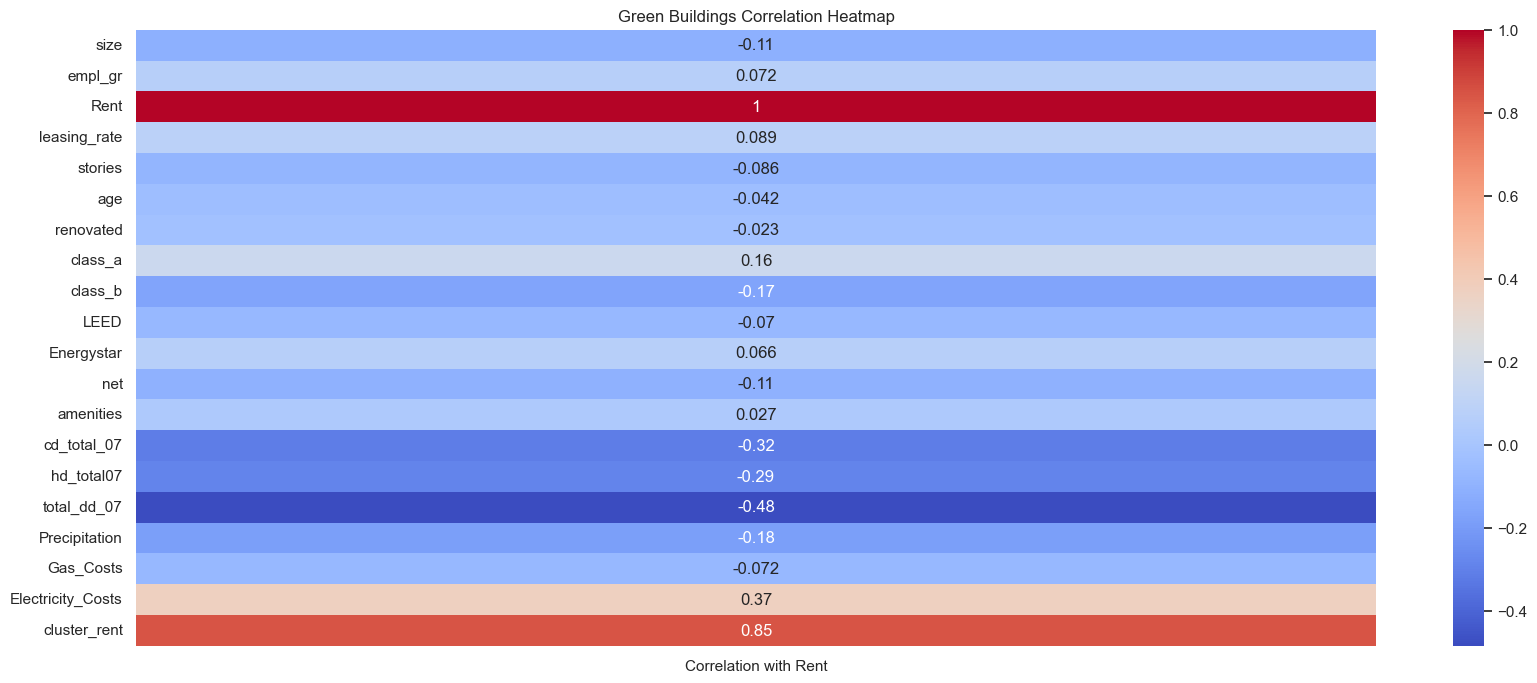

In [203]:
#Green Buildings variable corelation
columns_to_drop = ['CS_PropertyID','cluster','green_rating']
# correlation_matrix = df_green.drop(columns=columns_to_drop).corr()
correlation_matrix = (df_green.drop(columns=columns_to_drop)).corrwith(df_green['Rent'])

# Create a DataFrame with correlation values
correlation_df = pd.DataFrame({'Correlation with Rent': correlation_matrix})

plt.figure(figsize=(20, 8))  # Adjust the figure size (optional)
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')#, fmt=".2f")

plt.title('Green Buildings Correlation Heatmap')
plt.show()

Within Green buildings,

Apart from the general trend as we see in the whole dataset, we can see that stories has a negative corelation while age and renovation has a surprisingly positive correlation.

Energystar seems to be extracting a higher rent/positive corelation as compared to the LEED option.

Check Correlation of Rent against all variables of the Non Green Buildings in the dataset

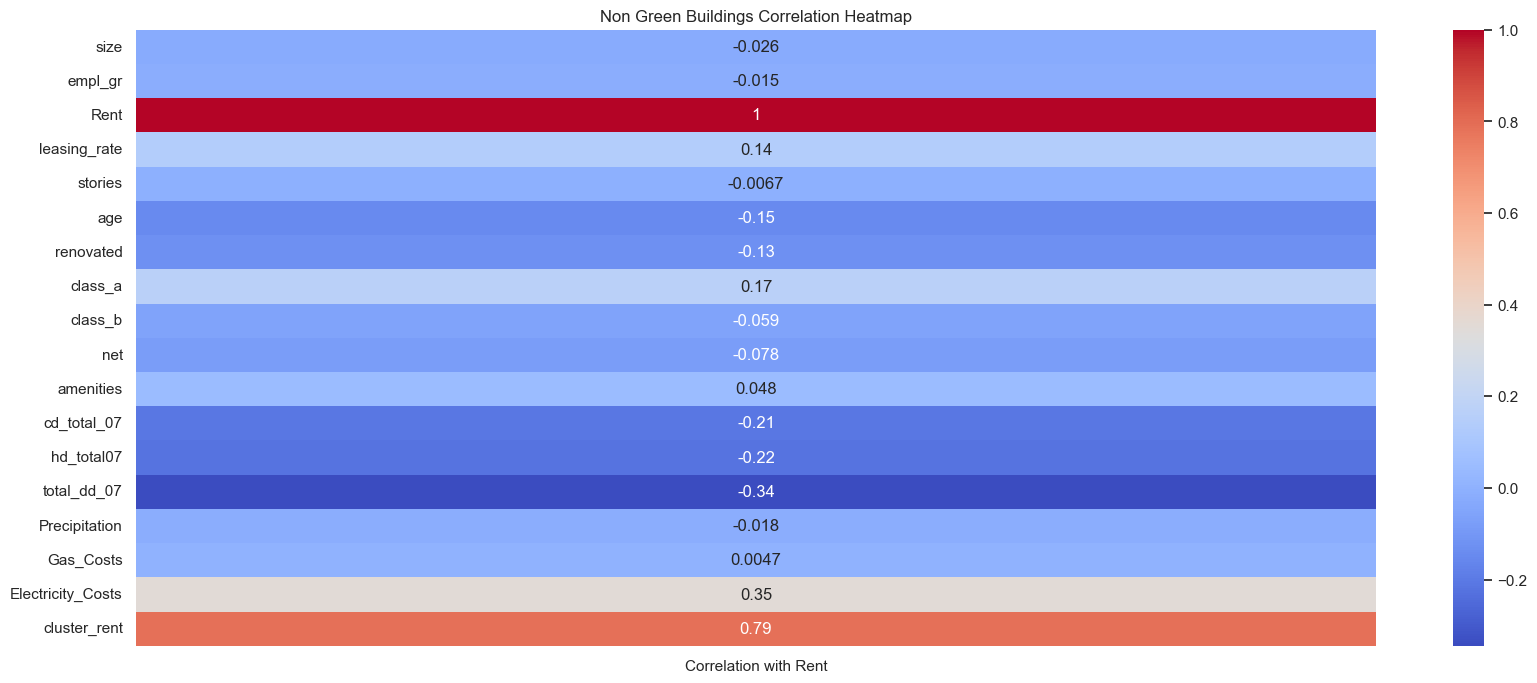

In [204]:
#Non - Green Buildings variable corelation
columns_to_drop = ['CS_PropertyID','cluster','green_rating','LEED','Energystar']
correlation_matrix = (df_non_green.drop(columns=columns_to_drop)).corrwith(df_non_green['Rent'])

# Create a DataFrame with correlation values
correlation_df = pd.DataFrame({'Correlation with Rent': correlation_matrix})

plt.figure(figsize=(20, 8))  # Adjust the figure size (optional)
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')#, fmt=".2f")

plt.title('Non Green Buildings Correlation Heatmap')
plt.show()

Within Non-Green Buildings,

We cannot see any specific new trend

Through our initial analyis, I can say that I do not completely agree with the "Excel Guru's" analyis as he has only considered the overall median rent of te Green vs Non Green buildings. The other factors such as class of the building (A seems to bring higher rent as compared to B and C), Electricity Costs, leasing rates , age, heating/cooling days have to be considered too.

We will now look at the graphs of a few features in comparing green vs non green buildings

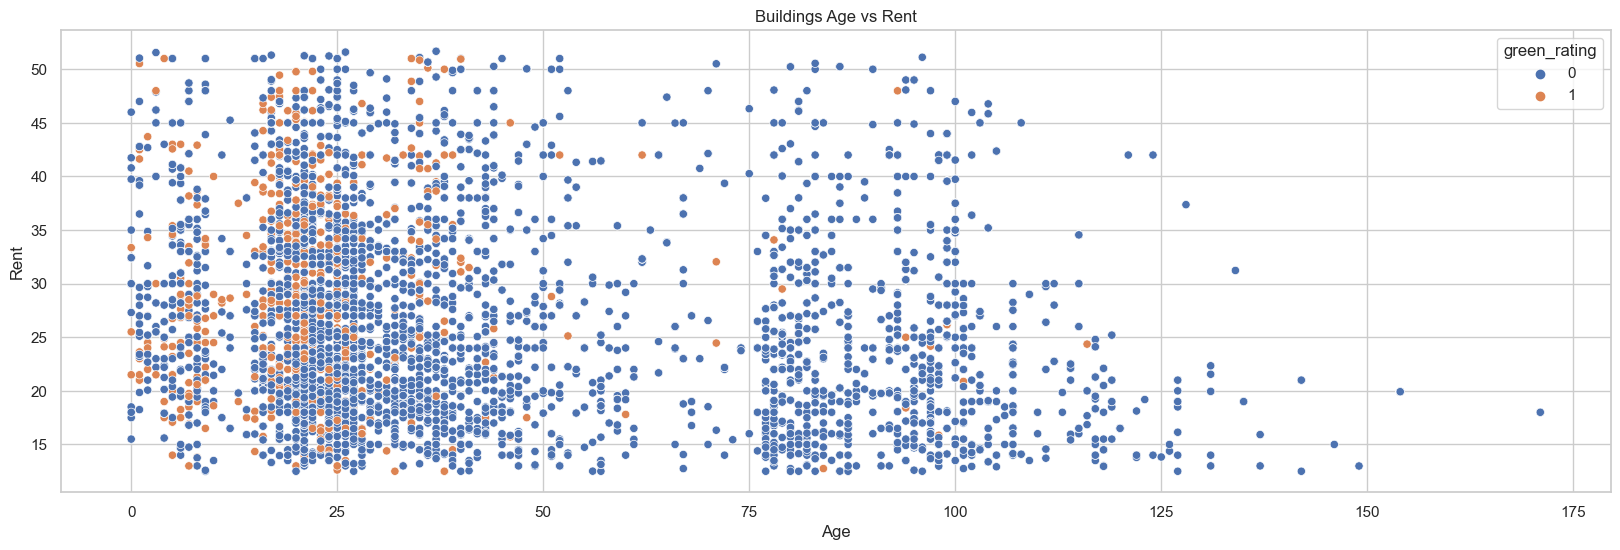

In [205]:
# Age vs Rent
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.scatterplot(x=df['age'], y=df['Rent'], hue=df['green_rating'])


# Add labels and title
plt.xlabel("Age")
plt.ylabel("Rent")
plt.title("Buildings Age vs Rent")

plt.show()

Most of the green buildings are younger than non-green buildings

Age does not seem to have a high correlation with rent

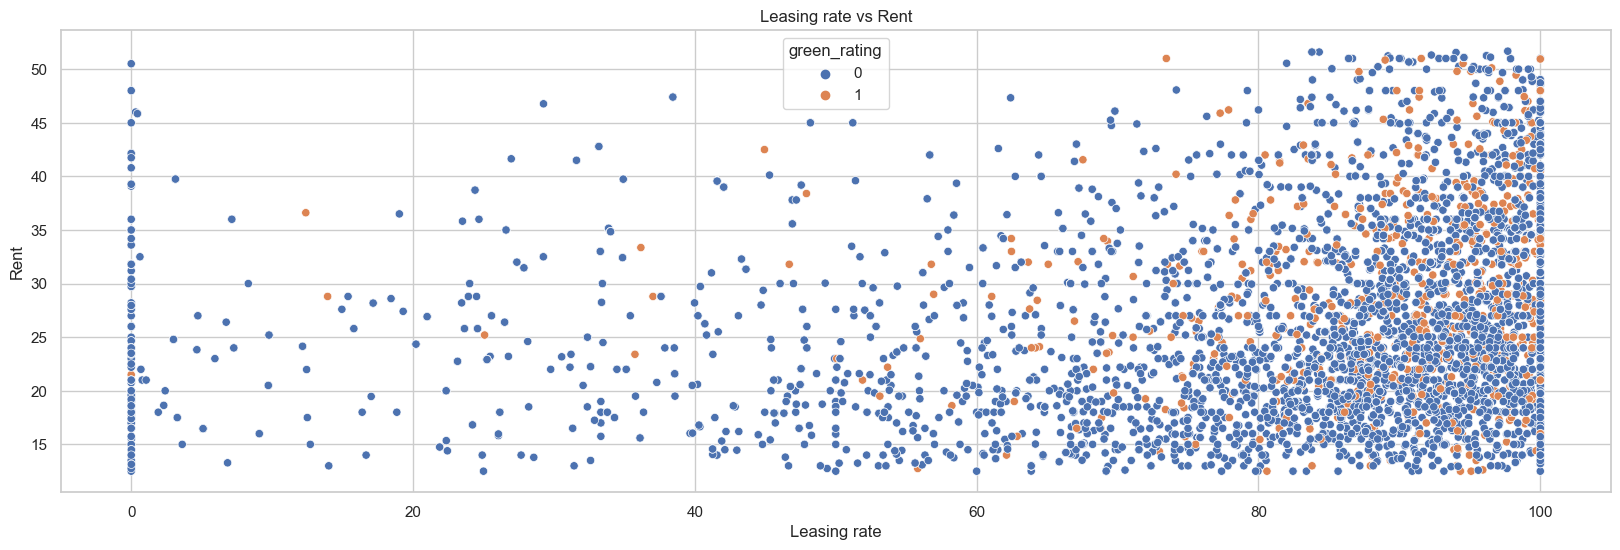

In [206]:
# Leasing rate vs Rent
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.scatterplot(x=df['leasing_rate'], y=df['Rent'], hue=df['green_rating'])


# Add labels and title
plt.xlabel("Leasing rate")
plt.ylabel("Rent")
plt.title("Leasing rate vs Rent")

plt.show()

Leasing Rate seems to have a low corelation with rent and we can see that in general, a higher ratio of green buildings seem to be having higher leasing rates as compared to non green buildings

In [207]:
print('Median Rates\n',df.groupby('green_rating')['leasing_rate'].median(),"\n")
print('Mean Rates\n',df.groupby('green_rating')['leasing_rate'].mean())

Median Rates
 green_rating
0    89.14
1    92.41
Name: leasing_rate, dtype: float64 

Mean Rates
 green_rating
0    82.101163
1    89.100642
Name: leasing_rate, dtype: float64


Higher median and mean leasing rate for green buildings

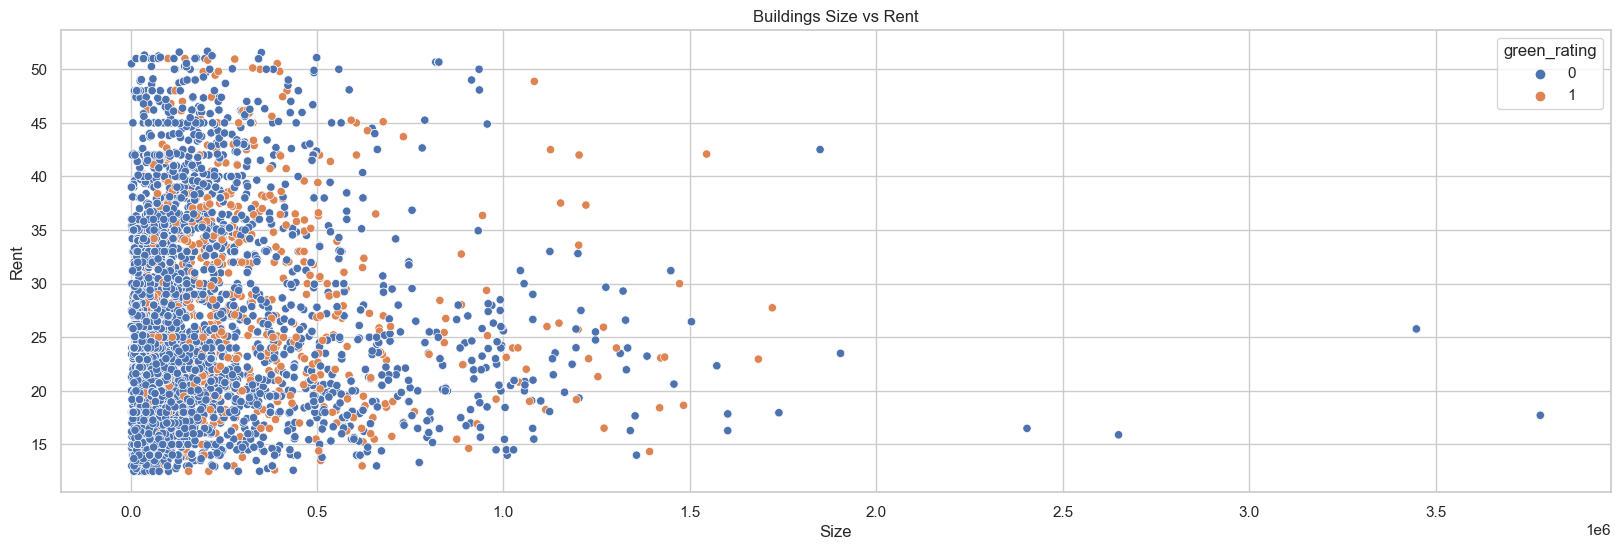

In [208]:
# Size vs Rent
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.scatterplot(x=df['size'], y=df['Rent'], hue=df['green_rating'])


# Add labels and title
plt.xlabel("Size")
plt.ylabel("Rent")
plt.title("Buildings Size vs Rent")

plt.show()

Green Buildings seem to have a sightly higher rent as compared to non green buildings of similar size, but overall size to rnt corelation looks weak.

In [209]:
print('Median Rates\n',df.groupby('green_rating')['size'].median(),"\n")
print('Mean Rates\n',df.groupby('green_rating')['size'].mean())

Median Rates
 green_rating
0    114666.0
1    235246.0
Name: size, dtype: float64 

Mean Rates
 green_rating
0    218613.164221
1    322577.441315
Name: size, dtype: float64


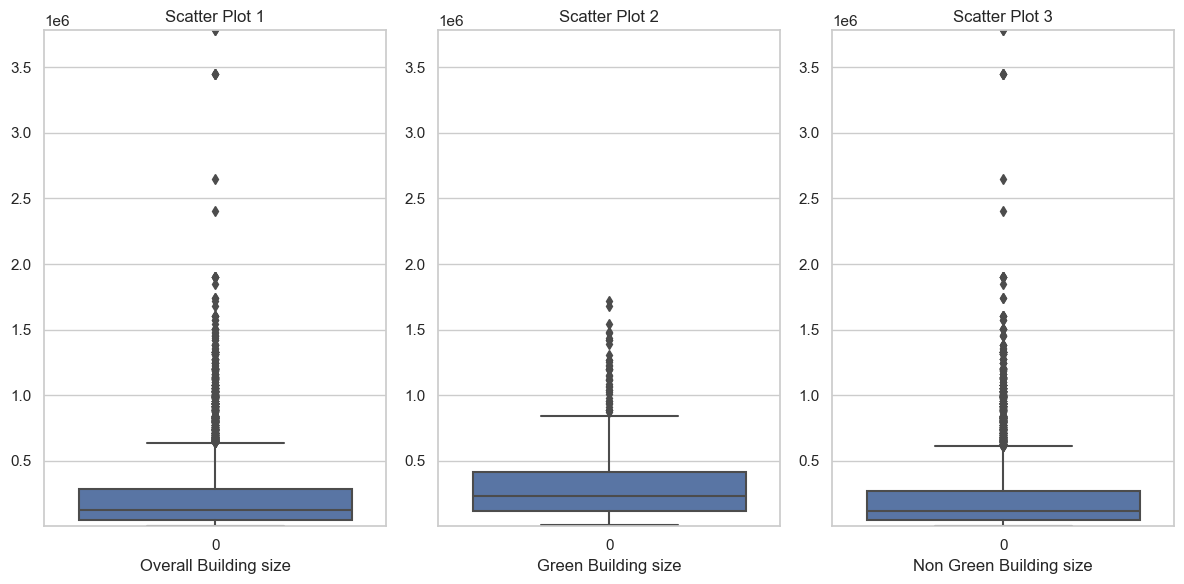

In [210]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
y_limit = (min(df['size']), max(df['size']))

# Scatter plot on the first subplot
sns.boxplot(data=df['size'],ax=axes[0])
axes[0].set_xlabel("Overall Building size")
axes[0].set_title("Scatter Plot 1")
axes[0].set_ylim(y_limit)

# Scatter plot on the second subplot
sns.boxplot(data=df_green['size'],ax=axes[1])
axes[1].set_xlabel("Green Building size")
axes[1].set_title("Scatter Plot 2")
axes[1].set_ylim(y_limit)

# Scatter plot on the second subplot
sns.boxplot(data=df[df['green_rating'] ==  0]['size'].reset_index(drop=True),ax=axes[2])
axes[2].set_xlabel("Non Green Building size")
axes[2].set_title("Scatter Plot 3")
axes[2].set_ylim(y_limit)

# Adjust layout and display plots
plt.tight_layout()
plt.show()


Green buildings seem to have larger mean and median sizes

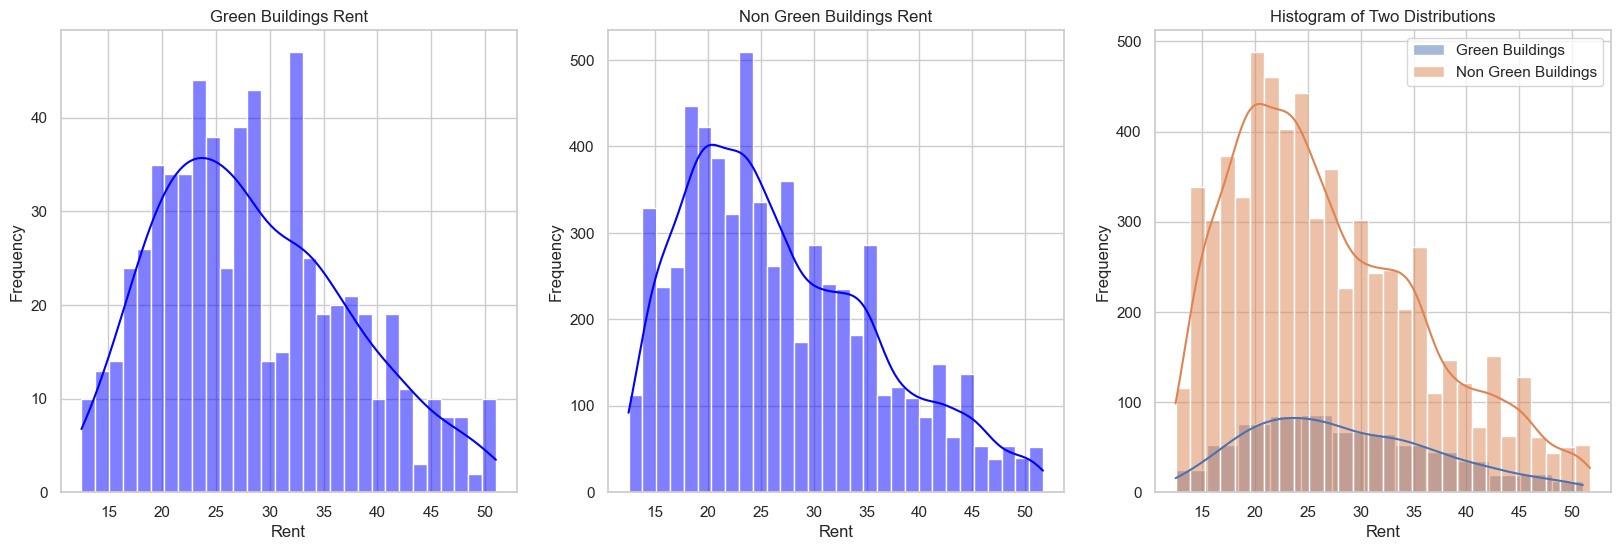

In [211]:
# Non Green Buildings
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.histplot(df_green['Rent'], bins=30, kde=True, color='blue')


# Add labels and title
plt.xlabel("Rent")
plt.ylabel("Frequency")
plt.title("Green Buildings Rent")

plt.subplot(132)
sns.histplot(df_non_green['Rent'], bins=30, kde=True, color='blue')


# Add labels and title
plt.xlabel("Rent")
plt.ylabel("Frequency")
plt.title("Non Green Buildings Rent")

plt.subplot(133)
sns.histplot(df_green['Rent'], label='Green Buildings', kde=True)
sns.histplot(df_non_green['Rent'], label='Non Green Buildings', kde=True)

# Add title and labels
plt.legend()
plt.title("Histogram of Two Distributions")
plt.xlabel("Rent")
plt.ylabel("Frequency")

plt.show()


Overall rent histogram of rent for green and non green buildings show that in general the distribution looks fairly similar excet that there are a much larger number of non green buildings

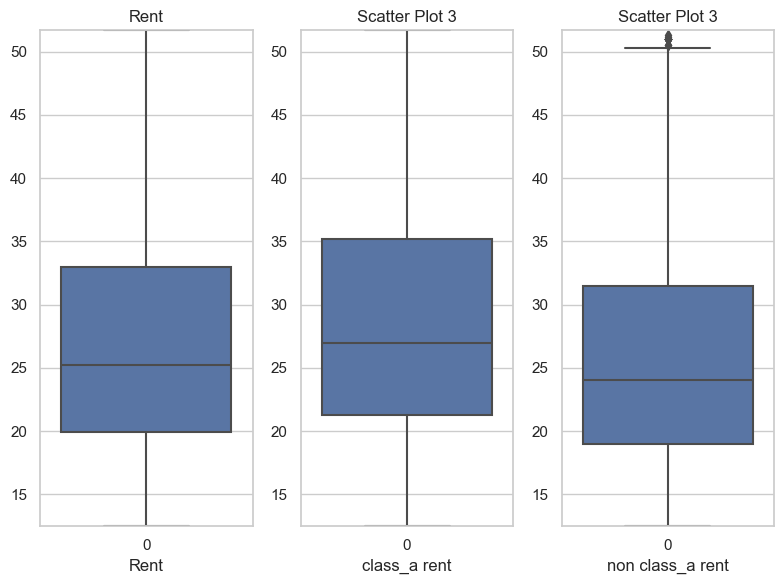

In [212]:
#class _a vs non class_a

y_limit = (min(df['Rent']), max(df['Rent']))

plt.figure(figsize=(8, 6))

plt.subplot(131)
sns.set(style="whitegrid")
sns.boxplot(data = df['Rent'])
plt.xlabel("Rent")
plt.title("Rent")
plt.ylim(y_limit)


plt.subplot(132)
sns.boxplot(data=df[df['class_a'] ==  1]['Rent'])
plt.xlabel("class_a rent")
plt.title("Scatter Plot 3")
plt.ylim(y_limit)

plt.subplot(133)
sns.boxplot(data=df[df['class_a'] ==  0]['Rent'].reset_index(drop=True))
plt.xlabel("non class_a rent")
plt.title("Scatter Plot 3")
plt.ylim(y_limit)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

Class_A buildings have a higher mean and median rent s compared to ther buildings

In [213]:
df

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856,157718,1230,173444,1.15,49.00,83.83,20,95,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7857,157420,1230,364000,1.15,50.00,98.46,22,52,0,0,...,0,0,1,1299,4796,6095,48.35,0.011757,0.045457,58.72
7858,157624,1230,212500,1.15,50.00,99.15,17,83,0,0,...,0,0,1,1299,4796,6095,48.35,0.011757,0.045457,58.72
7859,157777,1230,150000,1.15,50.55,82.00,15,83,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72


In [245]:
#We will conisider the median leaing rate as the minimum and a size of atleast 200k since we are talking about at huge15 story mix use building

df_final = df[(df['leasing_rate'] > df['leasing_rate'].median()) & (df['size'] > 100000)]
final_table = df_final.groupby(['green_rating','class_a','Energystar'])[['Rent','leasing_rate','size']].median()
final_table


Rent  leasing_rate      size
green_rating class_a Energystar                               
0            0       0           27.00        96.090  180078.5
             1       0           26.66        95.970  338737.0
1            0       0           24.68        97.105  271056.0
                     1           22.00        95.870  196621.0
             1       0           25.72        95.990  529618.5
                     1           29.00        96.480  289083.0

We can see that a Green building with Energystar is the only combination that gains a higher rent as compared to the non green counterparts

In [248]:
non_green_rent = final_table.loc[0,1,0]['Rent']
green_rent = final_table.loc[1,1,1]['Rent']
difference_rent = (green_rent - non_green_rent)
excess_rent = (difference_rent*250000)
years_taken = 5000000/excess_rent
per_year_non_green = (non_green_rent*250000)
per_year_green = (green_rent*250000)

print('Total cost of construction of green building = ',(100000000 + 0.05 * 100000000))
print('Total cost of construction of normal building = ',(100000000))
# print('Total income from class a green building per year = ',(27.43 * 250000))
# print('Total income from class a normal building per year = ',(27 * 250000))
print('Class A Green - Class A Normal = ', difference_rent)
# print('Non class A Green - Non class A Normal = -3.95$ per sq.ft')
print('Excess income per year ',excess_rent)
print('Years taken to get back the money = ',years_taken)
print('Years taken to get back the money assuming average occupancy of 90% = ',(5000000/(excess_rent*0.9)))
per_year_green

Total cost of construction of green building =  105000000.0
Total cost of construction of normal building =  100000000
Class A Green - Class A Normal =  2.34
Excess income per year  585000.0
Years taken to get back the money =  8.547008547008547
Years taken to get back the money assuming average occupancy of 90% =  9.49667616334283


7250000.0

A green, class A, EnergyStar building will earn $2.34 per sq.ft more than a non green class A builiding. Any other non Green building will be loss making.

We will take 8.55 years to recuperate the excess cost of $5 Million in construction. Even if we consider an average occupancy of 90%, we will recuperate the cost in 9.5 years after which we will be having a rental income of $7250000 per year

Final Recommendation:

Invest in a Green building which is a Class A EnergyStar building. If that is not possible, inverst in a normal building

It will take around 10 years for the building to recuperate the excess cost associated with it
